In [73]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
!pip install kneed
from kneed import KneeLocator

# Exercise 1: Clustering Method

In this exercise we will explore how each clustering algorithm discussed in the class works.

## Load Dataset

The dataset that we will use is a customer transaction in a certain mall. In this dataset there will 4 features including Gender, Age, Annual Income, and Spending Score. You can get the dataset from https://raw.githubusercontent.com/NathaliaMinoque/dataset/refs/heads/main/mall_customers.csv

In [74]:
# load dataset and show the first five sample
df = pd.read_csv('https://raw.githubusercontent.com/NathaliaMinoque/dataset/refs/heads/main/mall_customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [75]:
# rename the Annual Income (k$)	Spending Score (1-100) column
df = df.rename(columns={'Annual Income (k$)': 'AnnualIncome', 'Spending Score (1-100)': 'SpendingScore'})
df.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [76]:
# describe data
df.describe()

,CustomerID,Age,AnnualIncome,SpendingScore
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [77]:
# Check for null values in the dataset
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
AnnualIncome,0
SpendingScore,0


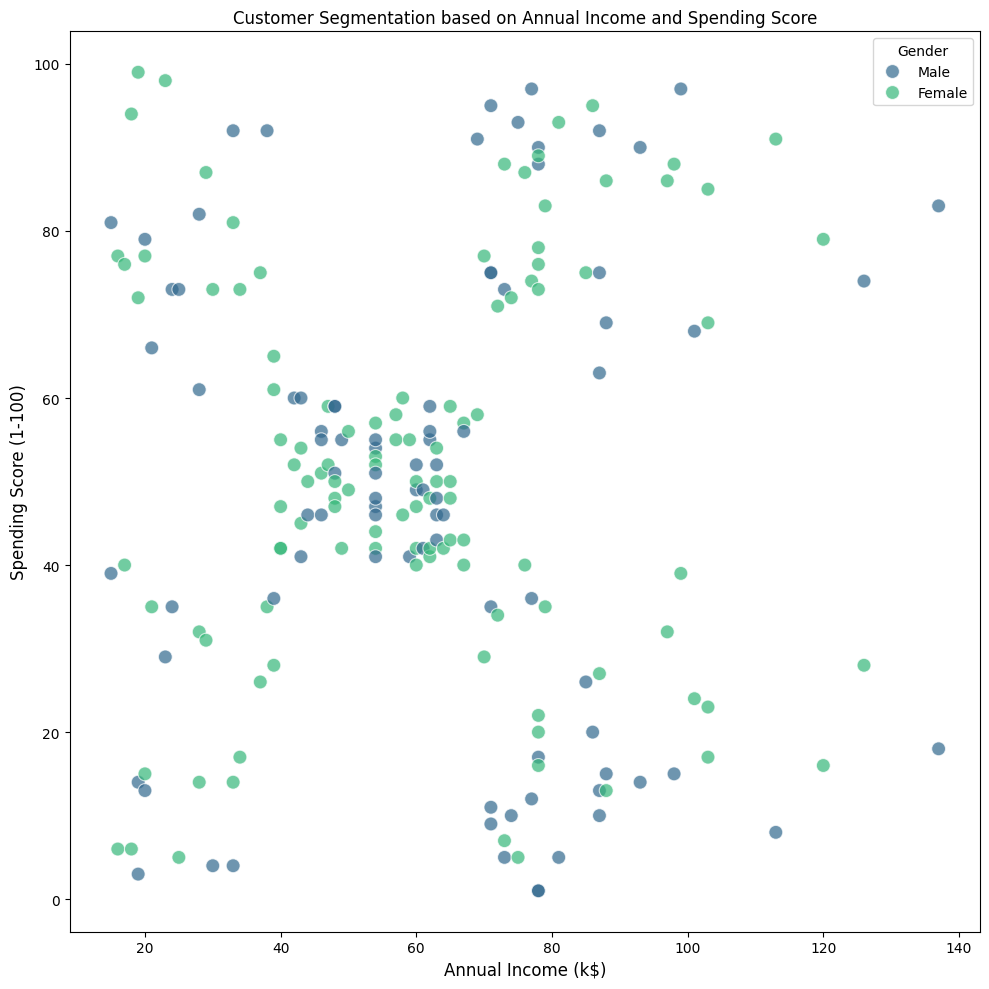

In [78]:
# make an insightful visualization and explain
plt.figure(figsize=(10, 10))
sns.scatterplot(x='AnnualIncome', y='SpendingScore', data=df, hue='Gender', palette='viridis', s=100, alpha=0.7)
plt.title('Customer Segmentation based on Annual Income and Spending Score')
plt.xlabel('Annual Income (k$)', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.legend(title='Gender', fontsize=10)
plt.tight_layout()
plt.show()

# Visualisasi scatter plot menunjukkan segmentasi pelanggan berdasarkan pendapatan tahunan dan skor pengeluaran. Tidak ditemukan perbedaan signifikan dalam pola belanja antara laki-laki dan perempuan.
# Hasil ini mengindikasikan adanya beberapa kelompok pelanggan dengan karakteristik belanja yang berbeda, di mana customer dengan range annual income 40-60K memiliki spending score antara 40 hingga 60.

## Data Preprocessing

For this case study, we only use income and spending score

In [79]:
# create new dataframe that consist only annual income and spending score
new_df = df[['AnnualIncome', 'SpendingScore']]
new_df.head()

,AnnualIncome,SpendingScore
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


Before we analyze our data, we need to scale the data. You can use MinMaxScaler or StandardScaler.

In [80]:
# scale dataset with standard scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
new_df = pd.DataFrame(scaler.fit_transform(new_df), columns=["AnnualIncome","SpendingScore"])
new_df.head()

,AnnualIncome,SpendingScore
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


In [81]:
# get stastical information on the new dataset
new_df.describe()

,AnnualIncome,SpendingScore
count,2.000000e+02,2.000000e+02
mean,-2.131628e-16,-1.465494e-16
std,1.002509e+00,1.002509e+00
min,-1.738999e+00,-1.910021e+00
25%,-7.275093e-01,-5.997931e-01
50%,3.587926e-02,-7.764312e-03
75%,6.656748e-01,8.851316e-01
max,2.917671e+00,1.894492e+00


Then, we check the inisial position for our sample. You may use pairplot or scattered chart for the visualization option.

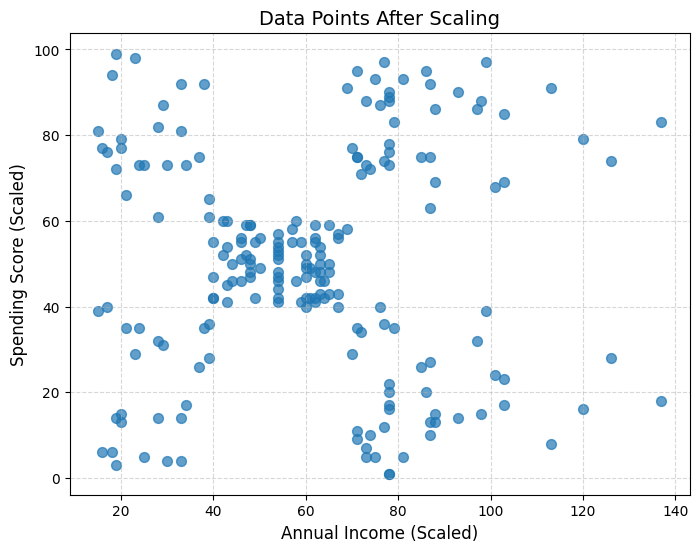

In [93]:
# Visualize the position
plt.figure(figsize=(8, 6))
plt.scatter(y=new_df['SpendingScore'], x = new_df['AnnualIncome'], s=50, alpha=0.7)
plt.title('Data Points After Scaling', fontsize=14)
plt.xlabel('Annual Income (Scaled)', fontsize=12)
plt.ylabel('Spending Score (Scaled)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

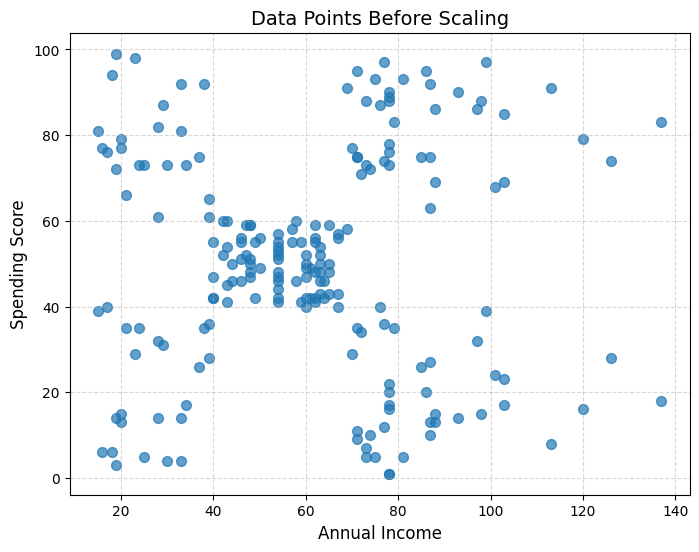

In [92]:
# Visualize the position using the original scale
plt.figure(figsize=(8, 6))
plt.scatter(y=df['SpendingScore'], x = df['AnnualIncome'], s=50, alpha=0.7)
plt.title('Data Points Before Scaling', fontsize=14)
plt.xlabel('Annual Income', fontsize=12)
plt.ylabel('Spending Score', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

## Clustering

The evaluation for chosing the number of K in KMEANS can be done by several methods such as elbow method.

1. using elbow method
In this case study, the below parameter settings is used:
- init: random
- range: (1,11)
- max_iter: 300
- random state: 42

In [84]:
# set the parameter for evaluating K
sse = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init='random', max_iter=300, random_state=42)
    kmeans.fit(new_df)
    sse.append(kmeans.inertia_)

Text(0, 0.5, 'SSE')

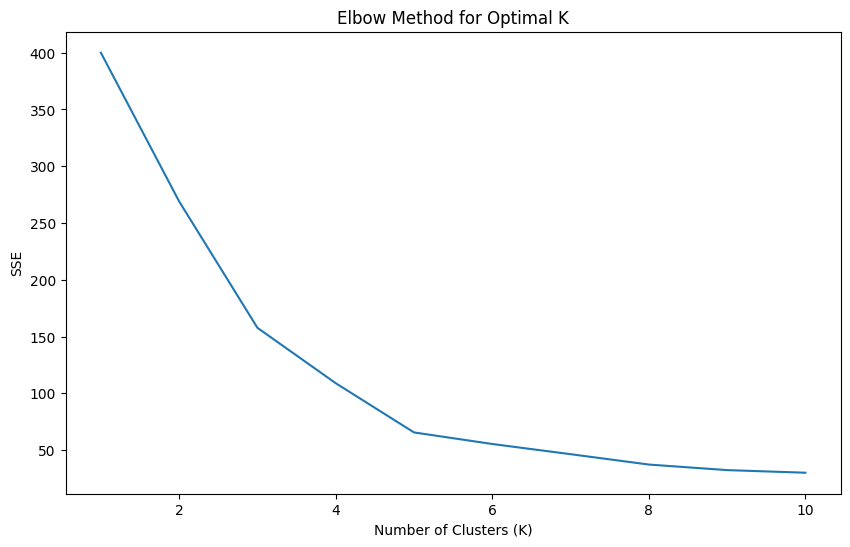

In [85]:
# manually visualize the elbow method using plotlib
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse)
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('SSE')

In [86]:
# using kneelocator to find the elbow/knee
kneedle = KneeLocator(range(1, 11), sse, curve='convex', direction='decreasing')
print("The best k for your model is:", kneedle.elbow)

The best k for your model is: 5


### K-Means Algorithm

For using KMeans clustering algorithm, you need to define the number of cluster, initialization number, number of iteration, and random state.

In this case study, the below parameter settings is used:
- centroid initialization: random
- number of cluster: 5
- number of iteration: 300
- random state: 42

In [87]:
# assign cluster with K-Means algorithm
kmeans = KMeans(n_clusters=5, init='random', max_iter=300, random_state=42)
y_pred = kmeans.fit_predict(new_df)
y_pred

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 4,
       0, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 2, 3, 4, 3, 2, 3, 2, 3,
       4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3], dtype=int32)

Visualize your result based on income and spending. You also can show the final position of the centroid.

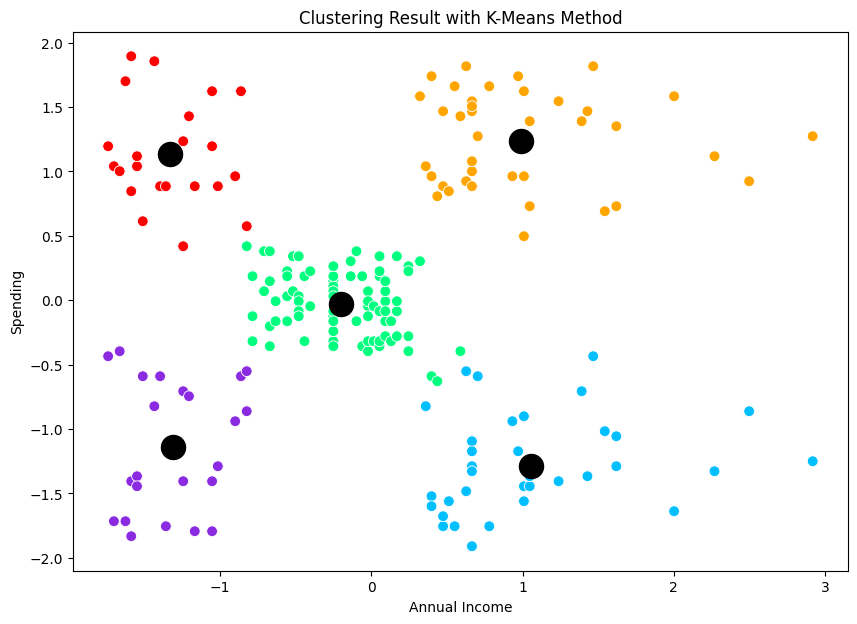

In [88]:
# visualize the result using scater chart
plt.figure(figsize=(10,7))

sns.scatterplot(x="AnnualIncome", y="SpendingScore", hue=y_pred, palette=["blueviolet",
                                             "red",
                                             "deepskyblue",
                                             "orange",
                                             "springgreen"],
                               legend=None, data=new_df, s=60)

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c="black")
plt.xlabel("Annual Income")
plt.ylabel("Spending")
plt.title("Clustering Result with K-Means Method")
plt.show()

In [89]:
# Inverse transform the scaled data to get the original values
new_df = pd.DataFrame(scaler.inverse_transform(new_df), columns=["AnnualIncome","SpendingScore"])
new_df.head()

,AnnualIncome,SpendingScore
0,15.0,39.0
1,15.0,81.0
2,16.0,6.0
3,16.0,77.0
4,17.0,40.0


In [91]:
# Group the data by cluster and calculate the mean spending and annual income for each cluster
cluster_summary = df.groupby(y_pred).agg({'SpendingScore': ['mean', 'std', 'min', 'max'],
                                          'AnnualIncome': ['mean', 'std', 'min', 'max']})

cluster_summary = cluster_summary.rename_axis('cluster')

cluster_summary

SpendingScore                    AnnualIncome                    
                 mean        std min max         mean        std min  max
cluster                                                                  
0           20.913043  13.017167   3  40    26.304348   7.893811  15   39
1           79.363636  10.504174  61  99    25.727273   7.566731  15   39
2           17.114286   9.952154   1  39    88.200000  16.399067  70  137
3           82.128205   9.364489  63  97    86.538462  16.312485  69  137
4           49.518519   6.530909  34  61    55.296296   8.988109  39   76

Write down (by adding text) the results of your interpretation and provide suggestions on what steps the company can take based on the clustering results you have created.

Cluster 0: <br>
Low Annual Income, Low Spending Score: This segment represents customers that price-sensitive and may not be frequent shoppers. <br> Suggestions: Offer discounts and promotions to encourage spending and develop affordable product lines or bundle deals

Cluster 1: <br>
Low Annual Income, High Spending Score: This segment consists of customers that may be willing to spend a significant portion of their income on specific products or brands. <br>
Suggestions: Offer flexible payment options or credit facilities and offer exclusive discounts or loyalty rewards for high-spending customers

Cluster 2: <br>
This segment includes customers that may be cautious spenders or may prioritize saving over spending. <br>
Suggestions: Create awareness about the value proposition of the products or services and target them with personalized marketing campaigns

Cluster 3: <br>
High Annual Income, High Spending Score: This segment comprises customers that are likely affluent and willing to spend on premium products and services. <br>
Suggestions: Offer exclusive experiences and personalized services and partner with luxury brands or high-end retailers.

Cluster 4: <br>
Moderate Annual Income, Moderate Spending Score: This segment consists of customers that may be a significant portion of the customer base and are likely to be price-conscious but still willing to spend on value-for-money products. <Br>
Suggestions: Focus on value for money and quality and offer a wide range of products and services to cater to diverse needs.

<write here>